# A brief notebook to answer the question:
# "Which job title am I actually doing in my current position"
a quick data exploration

2018-01
Justin Gosses

## Normally when trying to do text classification
##### You might follow an approach like this: http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#training-a-classifier
##### However, resumes and job descriptions are typically smaller in size than a normal NLP project, so I took a more contrained approach of:
1. Get a set of several hundred job skils.
2. Find which of those skills were in different job descriptions.
3. Turn said counts into vectors of features.
4. Use job title categories as lables.
5. Do some quick random forest and Support Vector Machine models to see which the distribution of skill words is predictive of job titles.

Optional part B: 
1. Convert model to JavaScript and have it all running live on the front-end so others can throw their resumes in there and see how they are clasified. 

## For starters, I'm only looking at data scientist vs. software engineers


### Part 1: 
Gather job titles & skills associated with each job title. 
Identify which job title best applies to what I do by comparing what I do (and what is in my resume) to job descriptions

https://insights.dice.com/wp-content/themes/dicenews2018/assets/d3/2017/skills-heat/index.html

#### Job titles & title_general

-  [Web Developer] - Web Developer, Entry Level Web Developer, Junior Web Developer, Senior Web Developer, Web Designer
- [Software Developer] - Software Developer, Junior Software Developer, Senior Software Developer
- [Software Engineer] - Software Engineer, Senior Software Engineer, Lead Software Engineer, Senior Software - Developer, Software Engineer II, Principle Software Engineer
- [Data Scientist] - Data Scientist, Senior Data Scientist, Junior Data Scientist
- [Data Analyst] -Data Analyst, Senior Data Analyst, Quantitative Analyst, Statistical Analyst, Prediction Analyst

In [41]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup 
import re
from vega3 import Vega
import json

## I found this list of IT Skills that DICE had created

In [6]:
df = pd.read_csv('DICE_2017_skills_hierarchy_skill_list_txt.csv')
df.head()

,ratio,tag,x,y,sector,skill
0,1.50,Operations,0.57819,0.86682,NaN,NaN
1,1.12,Database,0.61363,0.68666,NaN,NaN
2,1.32,Network,0.53984,0.71231,NaN,NaN
3,1.50,SQL,0.47992,0.71771,Data,SQL
4,1.43,Project management,0.48109,0.68706,NaN,NaN


In [7]:
#### It has 700 skills
tag = df[['tag']]
print("length of tag = ",len(tag))
tag[0:10]

length of tag =  700


,tag
0,Operations
1,Database
2,Network
3,SQL
4,Project management
5,Software development
6,Security
7,Java
8,Analytics
9,Oracle


#### Functions to check if a skill tag exists already in the dataframe. If not, adds it.

In [10]:
#### In a dataframe with a tag column, check if the given string [new_tag] is in that column
def checkForNewTag(df,new_tag):
    result_index = df.index[df['tag'] == new_tag].tolist()
    if len(result_index) == 0:
        return "not there"
    else:
        print(result_index[0],df.iloc[result_index[0]]['tag'])
        return "found it",result_index


#### In a dataframe with a tag column, add a new row with the new tag string to it
def addNewTagToDF(df,new_tag):
    df_new = pd.DataFrame([[new_tag]],columns=['tag'])
    appended_df = df.append(df_new).reset_index(drop=True)
    return appended_df


#### For a given dataframe with a tag column, check if tag value exists, if not add it. 
#### Use two functions above as helpers.
def checkForTagIfNotPresentAdd(df,list_of_tags):
    df_here = df.copy()
    for each_tag in list_of_tags:
        if checkForNewTag(df,each_tag)[0] == "found it":
            pass
        else:
            df_here = addNewTagToDF(df_here,each_tag)
    return df_here

In [11]:
checkForNewTag(tag,'JavaScript')

13 JavaScript


('found it', [13])

#### list of potential new terms I don't remember seeing, are somewhat new, or exist in my resume

In [12]:
list_of_tags = ["microsoft","validation","verification","virtual","web","sed","awk","fortan","ibm","technologists","cybersecurity","security","investment","build","deploy","devops","troubleshoot","strategic","advice","advise","pytorch","collaborate","Source","Code","engineering","global","keras","front","end","back","analytics","coding","code","programming","program","function","alogrithm","browserify","multi","browser","scipy","stakeholders","architecture","reality","impact","process",",workflow","consulting","prototype","innovative","root","cause","amazon","azure","cloud","financial","analysis","data",".net","design","apache","unit","engineering","gpu","user","ui","ux","management","visualization","priorities", "rework", "ambiguity", "fast paced", "HTML", "CSS", "Javascript","React","jQuery","photoshop","Illustrator","Java","Ruby","C#","complex problems", "C++", "C", "Java", "Python", "CVS", "Subversion","Git","Windows","software design","linux","Visual Studio","computer science", "Eclipse","NetBeans","ANT","project management"," Object Oriented Design","debugging","creative","software design", "C++", "C", "Java", "Unix", "Linux", "communication","testing","implementation","software design","teamwork","Mathematics","computer science", "mathematics","user support","JavaScript", "ES6", "Webpack", "Browserify", "Grunt", "Gulp", "NPM","GitHub","new technology","development","API","MongoDB","React", "Knockout","Ember","Backbone","Front End","HTML","CSS","OpenLayers","large-scale","UI","logic","MATLAB", "Python", "R", "JavaScript", "Spotfire", "MySQL", "MongoDB","GitHub","new technology","development","API","web scraping",'Database','svg','JQuery','Scikit-learn','three.js','aframe.js','regression','coached','NumPy','theno','keras','torch','pytorch','wordpress','React.js','graph','Neo4J','ML','Tableau','IoT','Internet of things','Weka','node','node.js','speech-to-text','client','microservices','micro-services','artificial intelligence','AI','random forest','bagging','prediction','web assembly','WASM','interactive','data visualization','meetup','jupyter','PostGres','Postgresql','GIS','map','map making','scikit-learn','tensorflow','d3.js','ar.js','deeplearning','deep learning','deep-learning','neural nets','convolutional','redux','vue','adminestrator','vega']

In [13]:
def takeOutLetters(list_of_tags):
    new_list_of_tags = []
    for skill in list_of_tags:
        if skill == "r" or skill == "R" or skill == "c" or skill == "C":
            pass
        else:
            new_list_of_tags.append(skill)
    return new_list_of_tags

In [14]:
list_of_tags = takeOutLetters(list_of_tags)

In [15]:
len(list_of_tags)

207

#### Function call that takes the list 'list_of_tags' and the 'tag' dataframe and adds the new skills that weren't originally present.

In [16]:
#### Function call that takes the list 'list_of_tags' and the 'tag' dataframe and adds the new skills that weren't originally present.
new_tag_list = checkForTagIfNotPresentAdd(tag,list_of_tags)
#### function will print the index of any skill tags that it finds were already in the list first
#### and then below prints the number of new skill tags added
print("Number of new skill tags is:",len(new_tag_list)-len(tag))

22 HTML
35 CSS
66 jQuery
7 Java
327 Ruby
41 C#
42 C++
7 Java
93 Python
361 CVS
190 Git
176 Eclipse
42 C++
7 Java
23 Unix
19 Linux
182 Mathematics
13 JavaScript
595 GitHub
72 API
413 MongoDB
22 HTML
35 CSS
29 UI
502 MATLAB
93 Python
13 JavaScript
61 MySQL
413 MongoDB
595 GitHub
72 API
1 Database
532 Tableau
Number of new skill tags is: 174


In [17]:
new_tag_list.describe()

,tag
count,874
unique,865
top,software design
freq,3


### Convert dataframe of skills to list

In [20]:
#### convert dataframe of skill tags into array of strings of those skills tags
array_of_skills =new_tag_list['tag'].values.tolist()

def addSpacesToStringInArray(stringArray):
    new_array = []
    for string in stringArray:
        new_array.append(" "+string+" ")
    return new_array

array_of_skills = new_tag_list['tag'].values.tolist()
array_of_skills_new = []
for eachSkill in array_of_skills:
    array_of_skills_new.append(eachSkill.lower())  
array_of_skills = list(set(array_of_skills_new))
array_of_skills = takeOutLetters(array_of_skills)
array_of_skills = addSpacesToStringInArray(array_of_skills)
array_of_skills

[' matlab ',
 ' financial management ',
 ' file systems ',
 ' knowledge transfer ',
 ' it operations ',
 ' research and development ',
 ' gui ',
 ' xslt ',
 ' financial analysis ',
 ' uml ',
 ' html ',
 ' xml ',
 ' red hat linux ',
 ' compliance ',
 ' legacy systems ',
 ' health care ',
 ' design documentation ',
 ' adobe photoshop ',
 ' automated testing ',
 ' utilities ',
 ' brand ',
 ' open source ',
 ' user stories ',
 ' business intelligence ',
 ' visualization ',
 ' prediction ',
 ' strategy ',
 ' process flow ',
 ' medicaid ',
 ' gis ',
 ' bpm ',
 ' restful ',
 ' web server ',
 ' citrix ',
 ' thread ',
 ' ospf ',
 ' itil ',
 ' wordpress ',
 ' microsoft ssrs ',
 ' advice ',
 ' bootstrap ',
 ' jdbc ',
 ' asset management ',
 ' autocad ',
 ' tier 1 ',
 ' electrical engineering ',
 ' physical data model ',
 ' subversion ',
 ' neural nets ',
 ' cisco certifications ',
 ' proposal writing ',
 ' project management ',
 ' salesforce.com ',
 ' business objects ',
 ' keras ',
 ' storage ',

### Save array of job skills as json

In [21]:
#### save as json
import json
with open('array_of_skills.json', 'w') as outfile:
    json.dump(array_of_skills, outfile)
   

In [22]:
#### open json and work with again
with open('array_of_skills.json') as json_data:
    d = json.load(json_data)
    print(d) 

[' matlab ', ' financial management ', ' file systems ', ' knowledge transfer ', ' it operations ', ' research and development ', ' gui ', ' xslt ', ' financial analysis ', ' uml ', ' html ', ' xml ', ' red hat linux ', ' compliance ', ' legacy systems ', ' health care ', ' design documentation ', ' adobe photoshop ', ' automated testing ', ' utilities ', ' brand ', ' open source ', ' user stories ', ' business intelligence ', ' visualization ', ' prediction ', ' strategy ', ' process flow ', ' medicaid ', ' gis ', ' bpm ', ' restful ', ' web server ', ' citrix ', ' thread ', ' ospf ', ' itil ', ' wordpress ', ' microsoft ssrs ', ' advice ', ' bootstrap ', ' jdbc ', ' asset management ', ' autocad ', ' tier 1 ', ' electrical engineering ', ' physical data model ', ' subversion ', ' neural nets ', ' cisco certifications ', ' proposal writing ', ' project management ', ' salesforce.com ', ' business objects ', ' keras ', ' storage ', ' organizational skills ', ' lean methodology ', ' net

In [23]:
#### Test that they are now the same thing
d == array_of_skills


True

In [24]:
array_of_skills = d

## Part II
## Look at job advertisments and count what skills they ask for or don't ask for

#### Convert text from html into lowercase & count skills found

In [28]:
#### Given a string and an array of skills in string form:
#### return a data object that has the count of each skill in that string
#### such that the result could be used as a row for machine-learning later.
def countTechSkill(string_s,skills_s_array):
    results_array = []
    for skill in skills_s_array:
        instance = string_s.count(skill)
        results_array.append({"skill":skill,"count":instance})
    return results_array

#### Find text data for many job descriptions of 2 or more types and count the times any word in that skill list is said

In [323]:
stuffToGet = [
    {
        "job":"Data Scientist",
        "full_title":"Lead Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=49bbd367c7075464&tk=1c5fgn96gb0dtboc&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Lead Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=a6e22bcf691b7dbe&tk=1c5fgn96gb0dtboc&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Data Scientist I/II",
        "url":"https://www.indeed.com/cmp/Zincalyst-Statistical-Consultants/jobs/Data-Scientist-3e775b4e96b68910?q=Data+Scientist&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Sr. Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=95b468510a383ab4&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Principal Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=2d968e6ab489a5c5&tk=1c5fgn96gb0dtboc&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=137abd479c2150db&tk=1c5fgn96gb0dtboc&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Sr Associate, Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=c2c04340cbcc3926&tk=1c5fgn96gb0dtboc&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Lead Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=a6e22bcf691b7dbe&tk=1c5fgo90uah5rdt3&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=30f92fc8a5035c91&tk=1c5fgoaikb0dtckt&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=43b305d5eb5e6b69&tk=1c5fgotl3ah5rde0&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Software Engineer - Python",
        "url":"https://www.indeed.com/viewjob?jk=c816cf9a1e07d061&tk=1c5fh16dvb0dtdph&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Software Engineer",
        "url":"https://www.indeed.com/viewjob?jk=91e0712669c90529&tk=1c5fh16dvb0dtdph&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Java Software Engineer",
        "url":"https://www.indeed.com/viewjob?jk=4bdcd1222b4d8c12&tk=1c5fh16dvb0dtdph&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Software Engineer",
        "url":"https://www.indeed.com/viewjob?jk=f6ad1a6edb8a61dd&tk=1c5fh16dvb0dtdph&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Python/Scala Software Engineer",
        "url":"https://www.indeed.com/viewjob?jk=25a0fb3231215f82&tk=1c5fh16dvb0dtdph&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Software Engineer",
        "url":"https://www.indeed.com/cmp/Global-Oncology-One,-Inc./jobs/Software-Engineer-f838f70f4775a8e3?q=Software+Engineer&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Software Development Engineer II",
        "url":"https://www.indeed.com/viewjob?jk=c226823895844ec7&tk=1c5fh16dvb0dtdph&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Applications Software Engineer",
        "url":"https://www.indeed.com/viewjob?jk=7583664ee5b668ce&q=Software+Engineer&l=Houston%2C+TX&tk=1c5fh5nhpb0dt9a8&from=web&vjs=3"
    },
#     asdfasdf
    {
        "job":"Software Engineer",
        "full_title":"Unreal Engine Software Developer",
        "url":"https://www.indeed.com/cmp/Managed-Staffing/jobs/Unreal-Engine-Software-Developer-f54f88eb4166e595?sjdu=QwrRXKrqZ3CNX5W-O9jEvSnYMz5IKQ_iO2bEAPai6qtuk3M73j9JCzx3qddZ2ENfwawXOPJyizPj_SfEiGEoeg4Xpkb8Kwc3hXIev_ISS6w&tk=1c5hiu9mla55p92d&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Python Software Engineer",
        "url":"https://www.indeed.com/viewjob?jk=c82f094e78e19b75&tk=1c5hj028p1ekc447&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Java Developer",
        "url":"https://www.indeed.com/cmp/Cynosure-Technologies/jobs/Java-Developer-2467edc887d76b8f?q=Software+Engineer&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Software Engineer",
        "url":"https://www.indeed.com/viewjob?jk=c6862a9ad334b572&tk=1c5hj0cfna55pd0r&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Engineering Software Developer",
        "url":"https://www.indeed.com/viewjob?jk=880182246045dad3&tk=1c5hj0cfna55pd0r&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Software Engineer",
        "url":"https://www.indeed.com/viewjob?jk=d77b5c50eb3d1ebe&tk=1c5hj0cfna55pd0r&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Principal Engineer - Software Development",
        "url":"https://www.indeed.com/viewjob?jk=b31f5378aa715bf6&tk=1c5hj15rpa55pb0g&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Software Engineer II",
        "url":"https://www.indeed.com/viewjob?jk=5b494525a44e042d&tk=1c5hj15rpa55pb0g&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=966dfacd0a0dd535&tk=1c5hjdkm9a55pejo&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=f3ffa6c9503838c1&tk=1c5hjdkm9a55pejo&from=serp&vjs=3"
    }
    
]

In [324]:
#### save the stuffToGet array in case I want to use it later from file
import json
with open('jobs_to_getDataFrom.json', 'w') as outfile:
    json.dump(stuffToGet, outfile)

In [325]:
with open('jobs_to_getDataFrom.json') as json_data:
    stuffToGet = json.load(json_data)
    print(stuffToGet)

[{'job': 'Data Scientist', 'url': 'https://www.indeed.com/viewjob?jk=49bbd367c7075464&tk=1c5fgn96gb0dtboc&from=serp&vjs=3', 'full_title': 'Lead Data Scientist'}, {'job': 'Data Scientist', 'url': 'https://www.indeed.com/viewjob?jk=a6e22bcf691b7dbe&tk=1c5fgn96gb0dtboc&from=serp&vjs=3', 'full_title': 'Lead Data Scientist'}, {'job': 'Data Scientist', 'url': 'https://www.indeed.com/cmp/Zincalyst-Statistical-Consultants/jobs/Data-Scientist-3e775b4e96b68910?q=Data+Scientist&vjs=3', 'full_title': 'Data Scientist I/II'}, {'job': 'Data Scientist', 'url': 'https://www.indeed.com/viewjob?jk=95b468510a383ab4&from=serp&vjs=3', 'full_title': 'Sr. Data Scientist'}, {'job': 'Data Scientist', 'url': 'https://www.indeed.com/viewjob?jk=2d968e6ab489a5c5&tk=1c5fgn96gb0dtboc&from=serp&vjs=3', 'full_title': 'Principal Data Scientist'}, {'job': 'Data Scientist', 'url': 'https://www.indeed.com/viewjob?jk=137abd479c2150db&tk=1c5fgn96gb0dtboc&from=serp&vjs=3', 'full_title': 'Data Scientist'}, {'job': 'Data Scient

In [326]:
# {'job': 'Software Engineer', 'url': 'https://www.indeed.com/viewjob?jk=91e0712669c90529&tk=1c5fh16dvb0dtdph&from=serp&vjs=3', 'full_title': 'Software Engineer'}

def getText(stuffToGet,array_of_skills):
    new_array_of_jobs = []
    results = []
    for job in stuffToGet:
        print("job title = ",job['job'])
        result = requests.get(job["url"])
        content = result.content
        soup = BeautifulSoup(content,'html.parser')
        samples = soup.find('span', {"id":"job_summary"})
        samples_low = samples.get_text().lower()
        noSpecial = re.sub('[^a-zA-Z0-9 \n\.]', '', samples_low)
#         array_of_skills =new_tag_list['tag'].values.tolist()
        results_array = []
        for skill in array_of_skills:
            instance = noSpecial.count(skill)
            results_array.append({"skill":skill,"count":instance})
        job["word_counts"] = results_array
        new_array_of_jobs.append(job)
    return new_array_of_jobs

In [327]:
new_array_of_jobs = getText(stuffToGet,array_of_skills)

job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Data Scientist
job title =  Data Scientist


In [328]:
new_array_of_jobs_orig = new_array_of_jobs

### Save as json for use later

In [329]:
import json
with open('new_array_of_jobs_orig.json', 'w') as outfile:
    json.dump(new_array_of_jobs_orig, outfile)

## Explore results by looking at word_counts & visualizing results
Skip this if you want.
Be careful about not overwriting arrays during visualization.

In [218]:
with open('new_array_of_jobs_orig.json') as json_data:
    new_array_of_jobs = json.load(json_data)
    print(new_array_of_jobs)

[{'job': 'Data Scientist', 'url': 'https://www.indeed.com/viewjob?jk=49bbd367c7075464&tk=1c5fgn96gb0dtboc&from=serp&vjs=3', 'full_title': 'Lead Data Scientist', 'word_counts': [{'count': 1, 'skill': ' matlab '}, {'count': 0, 'skill': ' financial management '}, {'count': 0, 'skill': ' file systems '}, {'count': 0, 'skill': ' knowledge transfer '}, {'count': 0, 'skill': ' it operations '}, {'count': 0, 'skill': ' research and development '}, {'count': 0, 'skill': ' gui '}, {'count': 0, 'skill': ' xslt '}, {'count': 0, 'skill': ' financial analysis '}, {'count': 0, 'skill': ' uml '}, {'count': 0, 'skill': ' html '}, {'count': 0, 'skill': ' xml '}, {'count': 0, 'skill': ' red hat linux '}, {'count': 0, 'skill': ' compliance '}, {'count': 0, 'skill': ' legacy systems '}, {'count': 0, 'skill': ' health care '}, {'count': 0, 'skill': ' design documentation '}, {'count': 0, 'skill': ' adobe photoshop '}, {'count': 0, 'skill': ' automated testing '}, {'count': 0, 'skill': ' utilities '}, {'coun

In [219]:
#### check out word_counts results of one job
new_array_of_jobs[8]['word_counts']

[{'count': 0, 'skill': ' matlab '},
 {'count': 0, 'skill': ' financial management '},
 {'count': 0, 'skill': ' file systems '},
 {'count': 0, 'skill': ' knowledge transfer '},
 {'count': 0, 'skill': ' it operations '},
 {'count': 0, 'skill': ' research and development '},
 {'count': 0, 'skill': ' gui '},
 {'count': 0, 'skill': ' xslt '},
 {'count': 0, 'skill': ' financial analysis '},
 {'count': 0, 'skill': ' uml '},
 {'count': 0, 'skill': ' html '},
 {'count': 0, 'skill': ' xml '},
 {'count': 0, 'skill': ' red hat linux '},
 {'count': 0, 'skill': ' compliance '},
 {'count': 0, 'skill': ' legacy systems '},
 {'count': 0, 'skill': ' health care '},
 {'count': 0, 'skill': ' design documentation '},
 {'count': 0, 'skill': ' adobe photoshop '},
 {'count': 0, 'skill': ' automated testing '},
 {'count': 0, 'skill': ' utilities '},
 {'count': 0, 'skill': ' brand '},
 {'count': 0, 'skill': ' open source '},
 {'count': 0, 'skill': ' user stories '},
 {'count': 0, 'skill': ' business intelligenc

In [78]:
def getJsonForVisualization(new_array_of_jobs):
    jobs_json_for_viz = new_array_of_jobs.copy()
    jobs_json_for_viz_holder = []
    counter = 0
    for eachjob in jobs_json_for_viz:
        job_obj = {}
        job_obj["job"] = eachjob['job']
        job_obj["url"] = eachjob['url']
        job_obj["job_uniq"] = eachjob['full_title']+"_"+str(counter)
        counter += 1
        for eachskill in eachjob['word_counts']:
            job_obj_2 = job_obj.copy()
            print("job_obj_2 =",job_obj_2)
            print("eachskill =",eachskill)
            print("eachjob",eachjob)
            job_obj_2["skill"] = eachskill['skill']
            job_obj_2["count"] = eachskill['count']
            jobs_json_for_viz_holder.append(job_obj_2)
    return jobs_json_for_viz_holder
    

In [79]:
jobs_json_for_viz_holder = getJsonForVisualization(new_array_of_jobs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.



eachskill = {'count': 0, 'skill': ' conflict resolution '}
eachjob {'job': 'Software Engineer', 'url': 'https://www.indeed.com/viewjob?jk=7583664ee5b668ce&q=Software+Engineer&l=Houston%2C+TX&tk=1c5fh5nhpb0dt9a8&from=web&vjs=3', 'full_title': 'Applications Software Engineer', 'word_counts': [{'count': 1, 'skill': ' matlab '}, {'count': 0, 'skill': ' financial management '}, {'count': 0, 'skill': ' file systems '}, {'count': 0, 'skill': ' knowledge transfer '}, {'count': 0, 'skill': ' it operations '}, {'count': 0, 'skill': ' research and development '}, {'count': 0, 'skill': ' gui '}, {'count': 0, 'skill': ' xslt '}, {'count': 0, 'skill': ' financial analysis '}, {'count': 0, 'skill': ' uml '}, {'count': 0, 'skill': ' html '}, {'count': 0, 'skill': ' xml '}, {'count': 0, 'skill': ' red hat linux '}, {'count': 0, 'skill': ' compliance '}, {'count': 0, 'skill': ' legacy systems '}, {'count': 0, 'skill': ' health care '}, {'count': 0, 'skill': ' design documentation '}, {'count': 0, 'skil

In [80]:
jobs_json_for_viz_holder[8000]

{'count': 0,
 'job': 'Data Scientist',
 'job_uniq': 'Data Scientist_9',
 'skill': ' jsp ',
 'url': 'https://www.indeed.com/viewjob?jk=43b305d5eb5e6b69&tk=1c5fgotl3ah5rde0&from=serp&vjs=3'}

In [84]:
import json
with open('jobs_json_for_viz_holder.json', 'w') as outfile:
    json.dump(jobs_json_for_viz_holder, outfile)

In [89]:
def showOnlyData(oneJobResult):
    array_of_resultsGreaterZero = []
    for skill in oneJobResult:
        if skill["count"] != 0:
            array_of_resultsGreaterZero.append(skill)
    return array_of_resultsGreaterZero

In [90]:
def extract_time(json):
    try:
        # Also convert to int since update_time will be string.  When comparing
        # strings, "10" is smaller than "2".
        return int(json['count'])
    except KeyError:
        return 0

#### Making copies so I can sort them and see what skills are more common in each job

In [91]:
first_job_matches = showOnlyData(new_array_of_jobs[0]['word_counts'])
first_job_matches_copy = first_job_matches.copy()
# lines.sort() is more efficient than lines = lines.sorted()
first_job_matches_copy.sort(key=extract_time, reverse=True)
first_job_matches_copy

[{'count': 4, 'skill': ' analysis '},
 {'count': 4, 'skill': ' data '},
 {'count': 4, 'skill': ' development '},
 {'count': 3, 'skill': ' analytics '},
 {'count': 2, 'skill': ' management '},
 {'count': 2, 'skill': ' innovative '},
 {'count': 2, 'skill': ' data analysis '},
 {'count': 2, 'skill': ' engineering '},
 {'count': 1, 'skill': ' matlab '},
 {'count': 1, 'skill': ' storage '},
 {'count': 1, 'skill': ' spotfire '},
 {'count': 1, 'skill': ' collaborate '},
 {'count': 1, 'skill': ' machine learning '},
 {'count': 1, 'skill': ' python '},
 {'count': 1, 'skill': ' java '},
 {'count': 1, 'skill': ' build '},
 {'count': 1, 'skill': ' intelligence '},
 {'count': 1, 'skill': ' business analysis '},
 {'count': 1, 'skill': ' artificial intelligence '},
 {'count': 1, 'skill': ' software engineering '},
 {'count': 1, 'skill': ' client '},
 {'count': 1, 'skill': ' end '},
 {'count': 1, 'skill': ' mathematics '},
 {'count': 1, 'skill': ' budget '}]

In [139]:
def makeVegeSkillFoundPlot(job_matches):
    return Vega({
  "$schema": "https://vega.github.io/schema/vega/v3.0.json",
  "width": 2000,
  "height": 200,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": job_matches
    }
  ],

  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {"events": "rect:mouseover", "update": "datum"},
        {"events": "rect:mouseout",  "update": "{}"}
      ]
    }
  ],

  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "skill"},
      "range": "width",
      "padding": 0.05,
      "round": True
    },
    {
      "name": "yscale",
      "domain": {"data": "table", "field": "count"},
      "nice": True,
      "range": "height"
    }
  ],

  "axes": [
    { "orient": "bottom", "scale": "xscale" },
    { "orient": "left", "scale": "yscale" }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data":"table"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "skill"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "count"},
          "y2": {"scale": "yscale", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": {
          "fill": {"value": "red"}
        }
      }
    },
    {
      "type": "text",
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip.skil", "band": 0.5},
          "y": {"scale": "yscale", "signal": "tooltip.count", "offset": -2},
          "text": {"signal": "tooltip.count"},
          "fillOpacity": [
            {"test": "datum === tooltip", "value": 0},
            {"value": 1}
          ]
        }
      }
    }
  ]
})
    

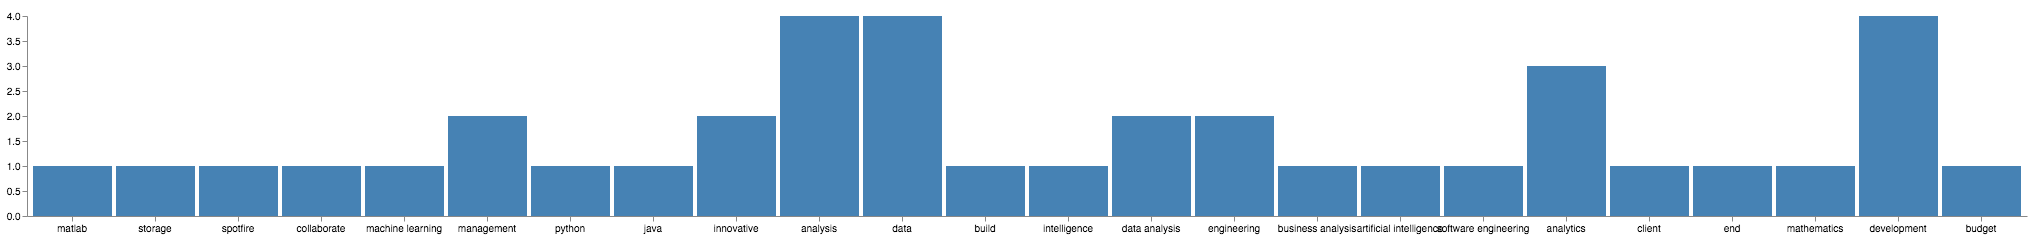

In [140]:
makeVegeSkillFoundPlot(first_job_matches)

In [141]:
def getJobMatchesForAllJob(new_array_of_jobs_0):
    new_array_of_jobs = new_array_of_jobs_0.copy()
    array_of_plots =  []
    for eachJob in range(len(new_array_of_jobs)):
        print("eachJob",eachJob)
        print("new_array_of_jobs[eachJob]",new_array_of_jobs[eachJob])
        fifth_job_matches_copy = new_array_of_jobs[eachJob]['word_counts'].copy()
#         fifth_job_matches_copy =  fifth_job_matches
        fifth_job_matches_copy.sort(key=extract_time, reverse=True)
        fifth_job_matches_copy = showOnlyData(fifth_job_matches_copy)
        print("fifth_job_matches_copy",fifth_job_matches_copy)
#         array_of_plots.append(makeVegeSkillFoundPlot(fifth_job_matches_copy)) 
        array_of_plots.append(fifth_job_matches_copy) 
    return array_of_plots

In [142]:

test =  getJobMatchesForAllJob(new_array_of_jobs)

eachJob 0
new_array_of_jobs[eachJob] {'job': 'Data Scientist', 'url': 'https://www.indeed.com/viewjob?jk=49bbd367c7075464&tk=1c5fgn96gb0dtboc&from=serp&vjs=3', 'full_title': 'Lead Data Scientist', 'word_counts': [{'count': 4, 'skill': ' analysis '}, {'count': 4, 'skill': ' data '}, {'count': 4, 'skill': ' development '}, {'count': 3, 'skill': ' analytics '}, {'count': 2, 'skill': ' management '}, {'count': 2, 'skill': ' innovative '}, {'count': 2, 'skill': ' data analysis '}, {'count': 2, 'skill': ' engineering '}, {'count': 1, 'skill': ' matlab '}, {'count': 1, 'skill': ' storage '}, {'count': 1, 'skill': ' spotfire '}, {'count': 1, 'skill': ' collaborate '}, {'count': 1, 'skill': ' machine learning '}, {'count': 1, 'skill': ' python '}, {'count': 1, 'skill': ' java '}, {'count': 1, 'skill': ' build '}, {'count': 1, 'skill': ' intelligence '}, {'count': 1, 'skill': ' business analysis '}, {'count': 1, 'skill': ' artificial intelligence '}, {'count': 1, 'skill': ' software engineering 

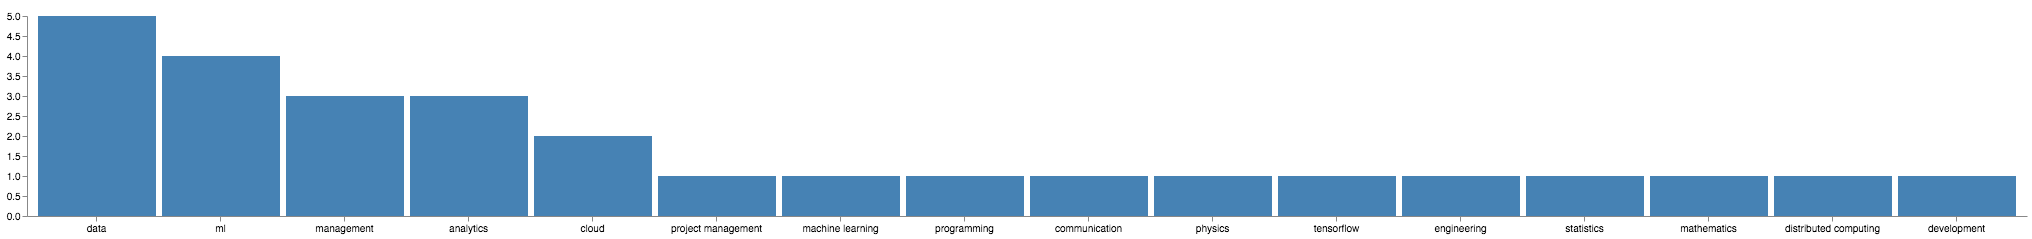

In [143]:
makeVegeSkillFoundPlot(test[8])

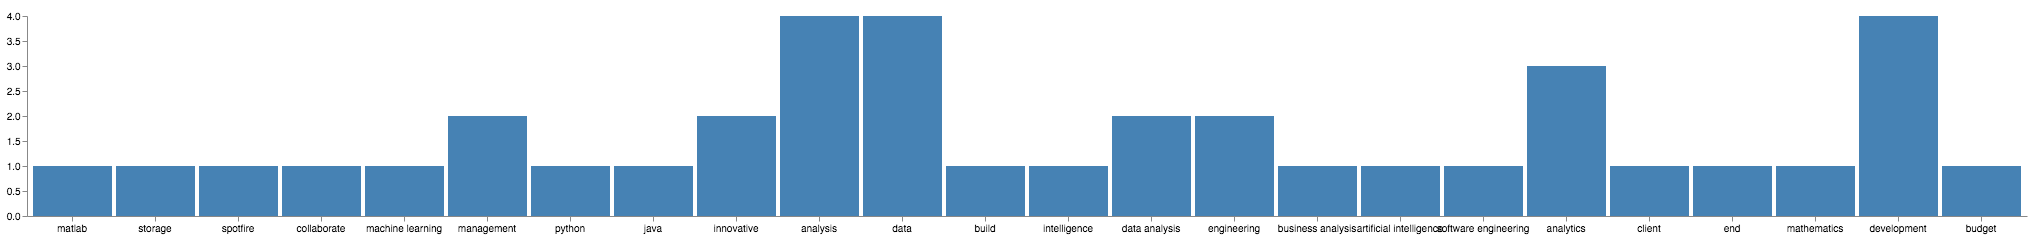

In [130]:
makeVegeSkillFoundPlot(test[13])

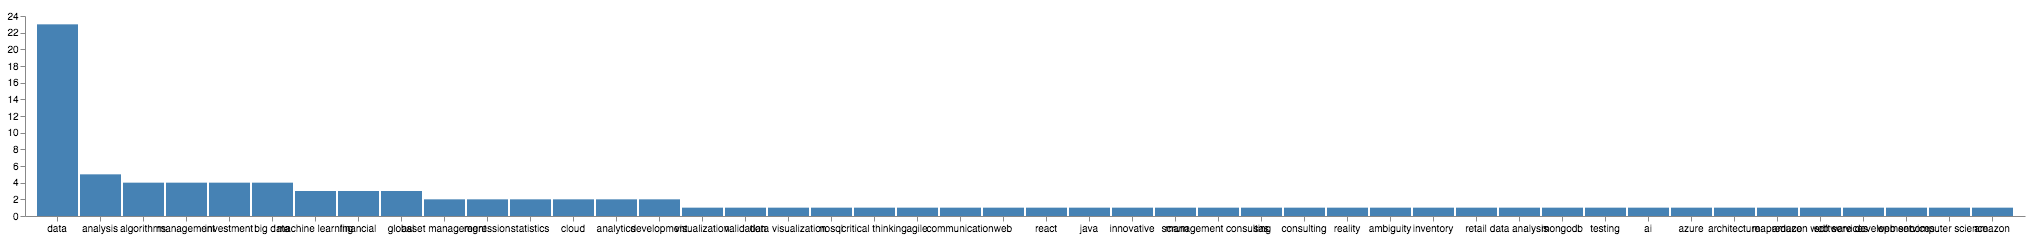

In [144]:
makeVegeSkillFoundPlot(test[1])

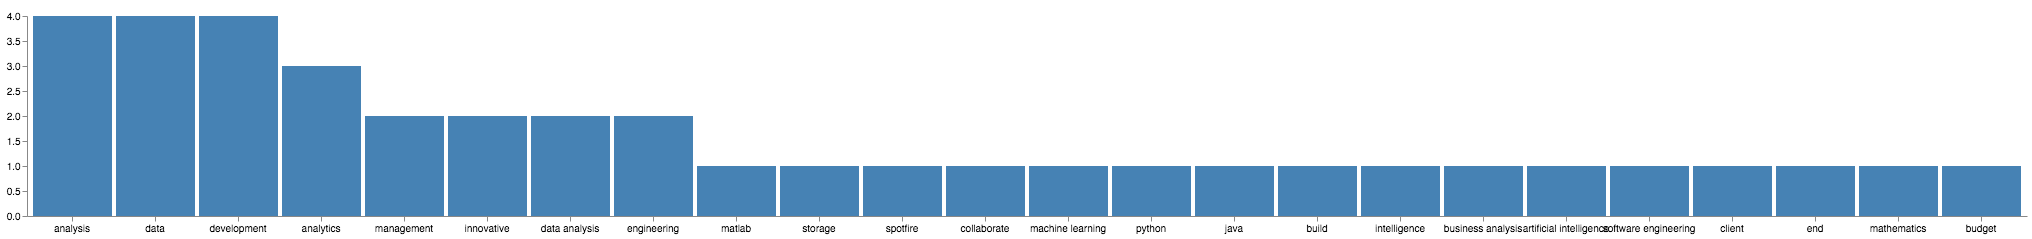

In [145]:
makeVegeSkillFoundPlot(test[0])

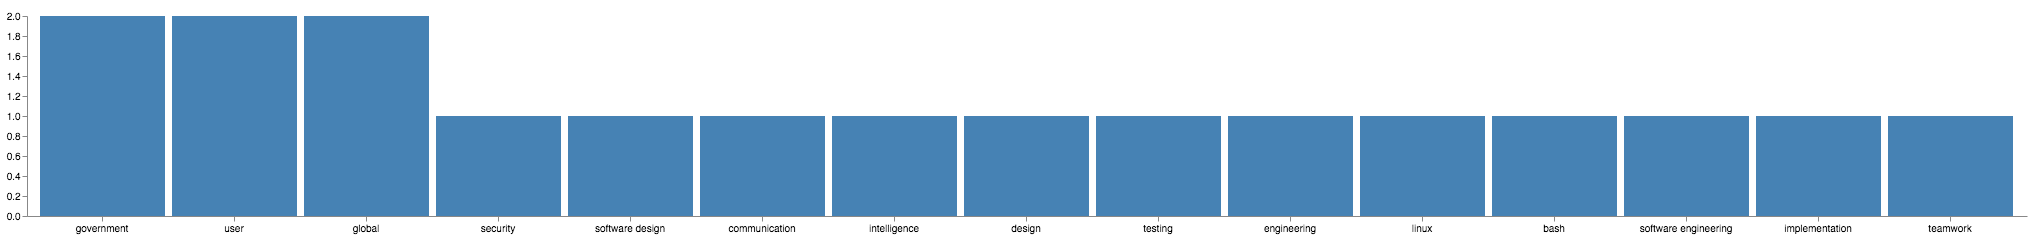

In [146]:
makeVegeSkillFoundPlot(test[11])

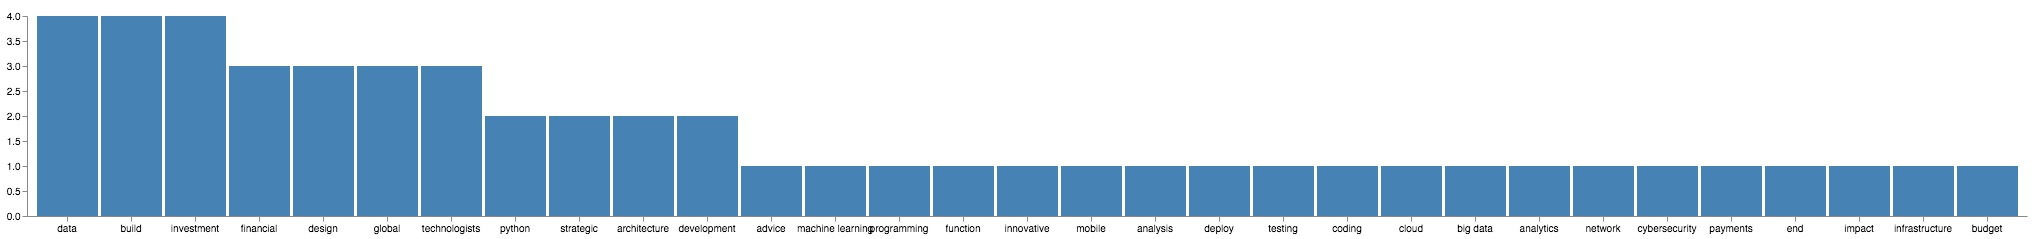

In [147]:
makeVegeSkillFoundPlot(test[14])

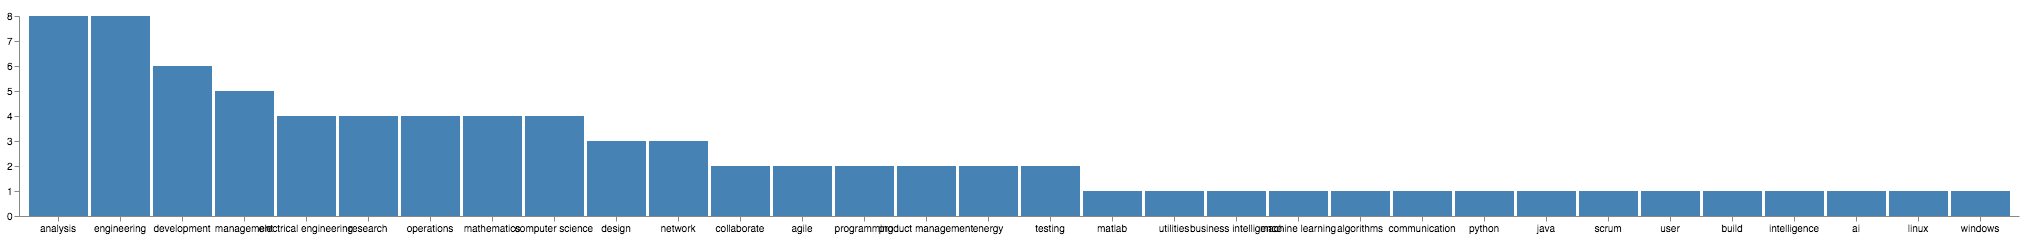

In [148]:
makeVegeSkillFoundPlot(test[17])

[{'count': 3, 'skill': ' data '},
 {'count': 1, 'skill': ' data mining '},
 {'count': 1, 'skill': ' machine learning '},
 {'count': 1, 'skill': ' python '},
 {'count': 1, 'skill': ' intelligence '},
 {'count': 1, 'skill': ' artificial intelligence '},
 {'count': 1, 'skill': ' analytics '},
 {'count': 0, 'skill': ' matlab '},
 {'count': 0, 'skill': ' financial management '},
 {'count': 0, 'skill': ' file systems '},
 {'count': 0, 'skill': ' knowledge transfer '},
 {'count': 0, 'skill': ' it operations '},
 {'count': 0, 'skill': ' research and development '},
 {'count': 0, 'skill': ' gui '},
 {'count': 0, 'skill': ' xslt '},
 {'count': 0, 'skill': ' financial analysis '},
 {'count': 0, 'skill': ' uml '},
 {'count': 0, 'skill': ' html '},
 {'count': 0, 'skill': ' xml '},
 {'count': 0, 'skill': ' red hat linux '},
 {'count': 0, 'skill': ' compliance '},
 {'count': 0, 'skill': ' legacy systems '},
 {'count': 0, 'skill': ' health care '},
 {'count': 0, 'skill': ' design documentation '},
 {'

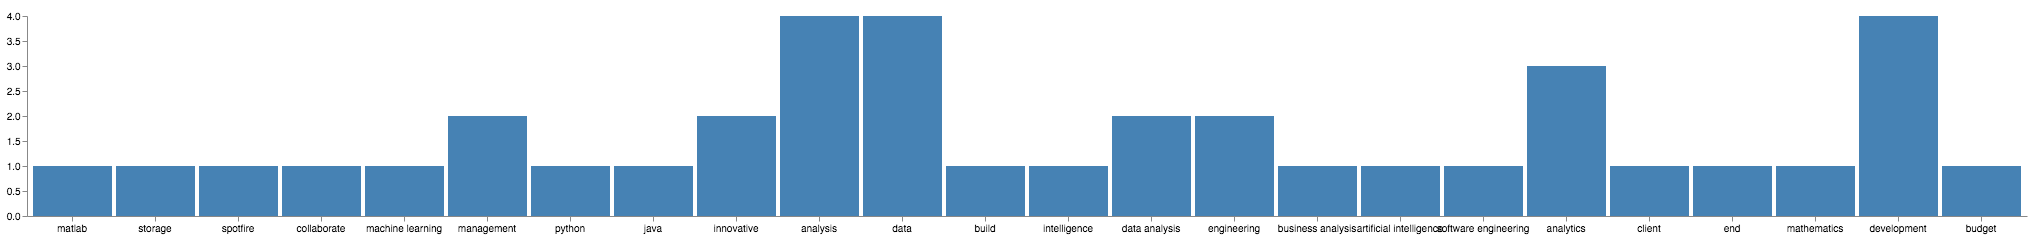

In [137]:
fifth_job_matches = new_array_of_jobs[5]['word_counts']
fifth_job_matches_copy =  fifth_job_matches.copy()
fifth_job_matches_copy.sort(key=extract_time, reverse=True)
fifth_job_matches_copy = showOnlyData(fifth_job_matches_copy)
Vega({
  "$schema": "https://vega.github.io/schema/vega/v3.0.json",
  "width": 2000,
  "height": 200,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": first_job_matches
    }
  ],

  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {"events": "rect:mouseover", "update": "datum"},
        {"events": "rect:mouseout",  "update": "{}"}
      ]
    }
  ],

  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "skill"},
      "range": "width",
      "padding": 0.05,
      "round": True
    },
    {
      "name": "yscale",
      "domain": {"data": "table", "field": "count"},
      "nice": True,
      "range": "height"
    }
  ],

  "axes": [
    { "orient": "bottom", "scale": "xscale" },
    { "orient": "left", "scale": "yscale" }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data":"table"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "skill"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "count"},
          "y2": {"scale": "yscale", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": {
          "fill": {"value": "red"}
        }
      }
    },
    {
      "type": "text",
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip.skil", "band": 0.5},
          "y": {"scale": "yscale", "signal": "tooltip.count", "offset": -2},
          "text": {"signal": "tooltip.count"},
          "fillOpacity": [
            {"test": "datum === tooltip", "value": 0},
            {"value": 1}
          ]
        }
      }
    }
  ]
})

## Part IV
## Convert json jobs results into array for numerical only area machine-learning

In [330]:
with open('new_array_of_jobs_orig.json') as json_data:
    new_array_of_jobs_ml = json.load(json_data)
    print(new_array_of_jobs_ml)

[{'job': 'Data Scientist', 'url': 'https://www.indeed.com/viewjob?jk=49bbd367c7075464&tk=1c5fgn96gb0dtboc&from=serp&vjs=3', 'full_title': 'Lead Data Scientist', 'word_counts': [{'count': 1, 'skill': ' matlab '}, {'count': 0, 'skill': ' financial management '}, {'count': 0, 'skill': ' file systems '}, {'count': 0, 'skill': ' knowledge transfer '}, {'count': 0, 'skill': ' it operations '}, {'count': 0, 'skill': ' research and development '}, {'count': 0, 'skill': ' gui '}, {'count': 0, 'skill': ' xslt '}, {'count': 0, 'skill': ' financial analysis '}, {'count': 0, 'skill': ' uml '}, {'count': 0, 'skill': ' html '}, {'count': 0, 'skill': ' xml '}, {'count': 0, 'skill': ' red hat linux '}, {'count': 0, 'skill': ' compliance '}, {'count': 0, 'skill': ' legacy systems '}, {'count': 0, 'skill': ' health care '}, {'count': 0, 'skill': ' design documentation '}, {'count': 0, 'skill': ' adobe photoshop '}, {'count': 0, 'skill': ' automated testing '}, {'count': 0, 'skill': ' utilities '}, {'coun

In [331]:
def convertJSONtoDataArray(jsonData):
    holder_of_features = []
    holder_of_labels = []
    for job in jsonData:
        skill_holder = []
        for count in job["word_counts"]:
            skill_holder.append(int(count["count"]))
        
        holder_of_features.append(skill_holder)
        if job["job"] == "Software Engineer":
            holder_of_labels.append(0)
        elif job["job"] == "Data Scientist":
            holder_of_labels.append(1)
        else:
            print("THERE IS A PROBLEM YOU HAVE A WEIRD JOB TITLE")
    return holder_of_features,holder_of_labels
            
            

In [332]:
holder_of_features,holder_of_labels = convertJSONtoDataArray(new_array_of_jobs_ml)

In [333]:
holder_of_features

[[1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [334]:
holder_of_labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1]

In [335]:
import json
with open('holder_of_features.json', 'w') as outfile:
    json.dump(holder_of_features, outfile)

In [336]:
import json
with open('holder_of_labels.json', 'w') as outfile:
    json.dump(holder_of_labels, outfile)

## Part V
### Machine-learning

In [337]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

In [338]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### DecisionTreeClassifier

In [339]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


In [340]:
X = holder_of_features
y = holder_of_labels

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, X, y)
scores.mean()                             

0.7185185185185184

In [366]:
clf_rf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf_rf, X, y)
scores.mean()    

0.9333333333333332

In [367]:

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
scores.mean() > 0.999

False

### KNeighborsClassifier

In [343]:

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 
KNeighborsClassifier(...)
print(neigh.predict([holder_of_features[1]]))

print(neigh.predict_proba([holder_of_features[1]]))

[1]
[[0. 1.]]


In [344]:
#### Examining results of KNN classification
counter = 0
for eachJob in holder_of_features:
    print(counter)
    print(neigh.predict_proba([eachJob]))
    counter += 1

0
[[0. 1.]]
1
[[0. 1.]]
2
[[0.33333333 0.66666667]]
3
[[0.66666667 0.33333333]]
4
[[0. 1.]]
5
[[0.33333333 0.66666667]]
6
[[0. 1.]]
7
[[0. 1.]]
8
[[0. 1.]]
9
[[0. 1.]]
10
[[1. 0.]]
11
[[0.66666667 0.33333333]]
12
[[1. 0.]]
13
[[1. 0.]]
14
[[1. 0.]]
15
[[0.66666667 0.33333333]]
16
[[1. 0.]]
17
[[0.66666667 0.33333333]]
18
[[1. 0.]]
19
[[0.66666667 0.33333333]]
20
[[0.66666667 0.33333333]]
21
[[0.66666667 0.33333333]]
22
[[1. 0.]]
23
[[1. 0.]]
24
[[0.66666667 0.33333333]]
25
[[0.66666667 0.33333333]]
26
[[0. 1.]]
27
[[0. 1.]]


only got one wrong, number 11 & 15 at time of writing

### next type?

### SVM SVC

#### linear kernal

In [345]:
import numpy as np
X = np.array(holder_of_features)
y = np.array(holder_of_labels)
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [346]:
#print(neigh.predict_proba([holder_of_features[2]]))
print(clf.predict([holder_of_features[2]]))

[0]


In [347]:
#Examining results of SVM SVC classification
counter = 0
for eachJob in holder_of_features:
#     print(counter)
    print(counter," instance = ",clf.predict([eachJob]))
    counter += 1
          

0  instance =  [0]
1  instance =  [1]
2  instance =  [0]
3  instance =  [0]
4  instance =  [1]
5  instance =  [0]
6  instance =  [1]
7  instance =  [1]
8  instance =  [0]
9  instance =  [0]
10  instance =  [0]
11  instance =  [0]
12  instance =  [0]
13  instance =  [0]
14  instance =  [0]
15  instance =  [0]
16  instance =  [0]
17  instance =  [0]
18  instance =  [0]
19  instance =  [0]
20  instance =  [0]
21  instance =  [0]
22  instance =  [0]
23  instance =  [0]
24  instance =  [0]
25  instance =  [0]
26  instance =  [0]
27  instance =  [1]


#### rbf kernal

In [348]:
### try with rbf kernal
import numpy as np
X = np.array(holder_of_features)
y = np.array(holder_of_labels)
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [349]:
counter = 0
for eachJob in holder_of_features:
#     print(counter)
    print(counter," instance = ",clf.predict([eachJob]))
    counter += 1

0  instance =  [0]
1  instance =  [1]
2  instance =  [0]
3  instance =  [0]
4  instance =  [1]
5  instance =  [0]
6  instance =  [1]
7  instance =  [1]
8  instance =  [0]
9  instance =  [0]
10  instance =  [0]
11  instance =  [0]
12  instance =  [0]
13  instance =  [0]
14  instance =  [0]
15  instance =  [0]
16  instance =  [0]
17  instance =  [0]
18  instance =  [0]
19  instance =  [0]
20  instance =  [0]
21  instance =  [0]
22  instance =  [0]
23  instance =  [0]
24  instance =  [0]
25  instance =  [0]
26  instance =  [0]
27  instance =  [1]


#### poly kernal

In [350]:
### try with rbf kernal
import numpy as np
X = np.array(holder_of_features)
y = np.array(holder_of_labels)
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [351]:
counter = 0
for eachJob in holder_of_features:
#     print(counter)
    print(counter," instance = ",clf.predict([eachJob]))
    counter += 1

0  instance =  [0]
1  instance =  [1]
2  instance =  [0]
3  instance =  [0]
4  instance =  [1]
5  instance =  [0]
6  instance =  [1]
7  instance =  [1]
8  instance =  [0]
9  instance =  [0]
10  instance =  [0]
11  instance =  [0]
12  instance =  [0]
13  instance =  [0]
14  instance =  [0]
15  instance =  [0]
16  instance =  [0]
17  instance =  [0]
18  instance =  [0]
19  instance =  [0]
20  instance =  [0]
21  instance =  [0]
22  instance =  [0]
23  instance =  [0]
24  instance =  [0]
25  instance =  [0]
26  instance =  [0]
27  instance =  [1]


## Part VI
## Now lets prepare text from my resume and see what it predicts

In [352]:
#### open the resume text from a saved txt file
f = open('Justin_Resume.txt','r')
text_ugly = f.read()
print(text_ugly)

Data Science, Data Visualization, and Web Developer
Offers two years of experience on the NASA data analytics team and nine years of experience in the oil industry as a geoscientist. Has successfully delivered projects in the machine learning, artificial intelligence, data visualization, and software engineering spaces working with clients in domains as diverse as geology, finance, human resources, and astronaut training. Seeks a position that applies my data analytics and programming skills to build new tools and capabilities.

Computer Language, Database, Web-development & Machine-Learning Skills: 
•	Language, DB & Cloud - Python, R, Java, JavaScript, Sed/Awk, Prostgresql, Neo4J, AWS System admin.
•	A.I. - Alexa skill development, CMU Sphinx speech-to-text, & Raspberry Pi IoT development.
•	ML - Scikit-learn, TensorFlow, NumPy, Theano, and Keras, Weka, MATLAB, K-means, SVM, & Decision Trees.
•	Web – Flask.py, Node.js, JQuery.js, Angular.js, & React.js, HTML, CSS, & Wordpress.
•	Data 

In [353]:
#### Clean the ugly resume text
def cleanResume(resume):
    resume = resume.lower()
    resume = re.sub('[^a-zA-Z0-9 \n\.]', '', resume)
    resume = resume.replace('\n',' ')
    resume = resume.replace('\r',' ')
    print(resume)
    return resume

In [354]:
#### I'm leaving in the periods as they are needed to capture some skills
clean_resume_text = cleanResume(text_ugly)

data science data visualization and web developer offers two years of experience on the nasa data analytics team and nine years of experience in the oil industry as a geoscientist. has successfully delivered projects in the machine learning artificial intelligence data visualization and software engineering spaces working with clients in domains as diverse as geology finance human resources and astronaut training. seeks a position that applies my data analytics and programming skills to build new tools and capabilities.  computer language database webdevelopment  machinelearning skills  language db  cloud  python r java javascript sedawk prostgresql neo4j aws system admin. a.i.  alexa skill development cmu sphinx speechtotext  raspberry pi iot development. ml  scikitlearn tensorflow numpy theano and keras weka matlab kmeans svm  decision trees. web  flask.py node.js jquery.js angular.js  react.js html css  wordpress. data visualization  d3.js three.js seaborn ggplot2 bokeh vega tableau

In [355]:
def convertJSONtoDataArray(jsonData):
    holder_of_features = []
    holder_of_labels = []
    for job in jsonData:
        skill_holder = []
        for count in job["word_counts"]:
            skill_holder.append(int(count["count"]))
        
        holder_of_features.append(skill_holder)
        if job["job"] == "Software Engineer":
            holder_of_labels.append(0)
        elif job["job"] == "Data Scientist":
            holder_of_labels.append(1)
        else:
            print("THERE IS A PROBLEM YOU HAVE A WEIRD JOB TITLE")
    return holder_of_features,holder_of_labels

In [356]:
resume_obj = {"job":'Data Scientist',"full_title":'Data Scientist',"url":"none"}

In [357]:
print(type(clean_resume_text))

<class 'str'>


In [358]:
def createFeaturesForTest(resume_obj,clean_resume_text,array_of_skills):
    results_array = []
    for skill in array_of_skills:
            instance = clean_resume_text.count(skill)
            results_array.append({"skill":skill,"count":instance})
    resume_obj["word_counts"] = results_array
    return resume_obj
        
# results_array = []
#         for skill in array_of_skills:
#             instance = noSpecial.count(skill)
#             results_array.append({"skill":skill,"count":instance})
#         job["word_counts"] = results_array
#         new_array_of_jobs.append(job)

In [359]:
obj_job_skills_OfResume = createFeaturesForTest(resume_obj,clean_resume_text,array_of_skills)

In [360]:
obj_job_skills_OfResume

{'full_title': 'Data Scientist',
 'job': 'Data Scientist',
 'url': 'none',
 'word_counts': [{'count': 1, 'skill': ' matlab '},
  {'count': 0, 'skill': ' financial management '},
  {'count': 0, 'skill': ' file systems '},
  {'count': 0, 'skill': ' knowledge transfer '},
  {'count': 0, 'skill': ' it operations '},
  {'count': 0, 'skill': ' research and development '},
  {'count': 0, 'skill': ' gui '},
  {'count': 0, 'skill': ' xslt '},
  {'count': 0, 'skill': ' financial analysis '},
  {'count': 0, 'skill': ' uml '},
  {'count': 1, 'skill': ' html '},
  {'count': 0, 'skill': ' xml '},
  {'count': 0, 'skill': ' red hat linux '},
  {'count': 0, 'skill': ' compliance '},
  {'count': 0, 'skill': ' legacy systems '},
  {'count': 0, 'skill': ' health care '},
  {'count': 0, 'skill': ' design documentation '},
  {'count': 0, 'skill': ' adobe photoshop '},
  {'count': 0, 'skill': ' automated testing '},
  {'count': 0, 'skill': ' utilities '},
  {'count': 0, 'skill': ' brand '},
  {'count': 0, 's

In [361]:
def convertJSONtoDataArray(jsonData):
    holder_of_features = []
    holder_of_labels = []
    for job in jsonData:
        skill_holder = []
        for count in job["word_counts"]:
            skill_holder.append(int(count["count"]))
        
        holder_of_features.append(skill_holder)
        if job["job"] == "Software Engineer":
            holder_of_labels.append(0)
        elif job["job"] == "Data Scientist":
            holder_of_labels.append(1)
        else:
            print("THERE IS A PROBLEM YOU HAVE A WEIRD JOB TITLE")
    return holder_of_features,holder_of_labels

In [362]:
holder_of_features_resume,holder_of_labels_resume = convertJSONtoDataArray([obj_job_skills_OfResume])

In [363]:
holder_of_features_resume

[[1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  6,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,


In [364]:
holder_of_labels_resume

[1]

#### KNN prediction

In [369]:
print(neigh.predict_proba(holder_of_features_resume))

[[0. 1.]]


first item is class 0 or data scientist 
second item is very approximate probability of 100%

which means I'm very likely a data scientist